# Audio Feature Extraction

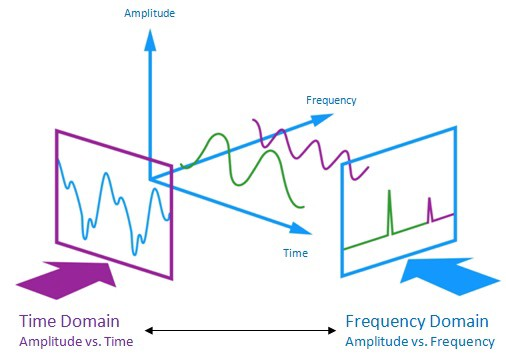

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Sample files

/kaggle/input/birdsong-recognition/train_audio/brdowl/XC413729.mp3

/kaggle/input/birdsong-recognition/train_audio/pilwoo/XC451058.mp3

/kaggle/input/birdsong-recognition/train_audio/semplo/XC337236.mp3

/kaggle/input/birdsong-recognition/train_audio/ruckin/XC131957.mp3

/kaggle/input/birdsong-recognition/train_audio/linspa/XC475289.mp3

/kaggle/input/birdsong-recognition/train_audio/ribgul/XC151285.mp3

In [ ]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
from matplotlib import gridspec
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data, sr = librosa.load("/kaggle/input/birdsong-recognition/train_audio/brdowl/XC413729.mp3",sr=None)
print(type(data))
print(len(data))
print(type(sr))
print(sr)

In [ ]:
ipd.Audio("/kaggle/input/birdsong-recognition/train_audio/brdowl/XC413729.mp3")

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sr)

## Amplitude vs Time
This waveplot represents the <font color= 'orange'>amplitude</font> from the audio
you can see the listen the sound while seeing this chart, whenever the sound is high the spread of chart is also high especially beginning and <font color= 'orange'>from 8 to 27 seconds.</font>

In [ ]:
#display Spectrogram
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

In [ ]:
# log of frequencies 
plt.figure(figsize=(14, 5))
plt.title="Log Spectrom",
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Frequncy vs Time
In Audio, the sound is generated by the <font color= 'orange'>frequncy</font>. there are different ranges in frequncy. each sound has its own frequncy. you can see the <font color= 'orange'>Orange color strips in Spectrom and Log Spectrom charts</font>. that is the place the sound was in high frequncy.

## Zero Crossing Rate

We need to measure this <font color = 'orange'>Zero Crossing Rate</font> to understand the Smoothness of the sound if its a kind of voice. this is about <font color = 'orange'>counting how many number of times the signal is crossing the 0 line in a specific time period</font>. if its low like the below chart, its nice to hear, if its high like 1000 times its very difficult to listen.

In [ ]:
# Zooming in Zero Crossing Rate
n0 = 10000
n1 = 10100
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
print(sum(zero_crossings))

you can count the signal line crossed the 0 line, as I did 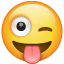

## Spectral Centroid

It indicates where the <font color = 'orange'>center of mass of the spectrum</font> is located. its the <font color = 'orange'>measure of the brightness of a sound</font>

In [ ]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn

spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
print(spectral_centroids.shape)

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

The <font color='red'>Red</font> line shows the spectrol centroid of this audio. It ends with above <font color = 'green'>0.75</font>. so the sound is good.

## Spectral Rolloff
its a <font color = 'orange'>specified percentage of the total spectral energy</font> in the Frequency of an Audio

In [ ]:
plt.figure(figsize = (14,5))
spectral_rolloff = librosa.feature.spectral_rolloff(data, sr=sr)[0]
librosa.display.waveplot(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## MFCC - Mel-Frequency Cepstral Coefficients
its about a small set of features (usually about 10–20) which concisely describe the <font color = 'orange'>overall shape of a spectral envelope</font>.

In [ ]:
mfccs = librosa.feature.mfcc(data, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.figure(figsize = (14,5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

Calculated <font color = 'orange'>MFCC: 20, Frames: 7492</font>

MFCC: you can count and check the y-axis 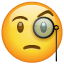

## Linear-frequency power spectrogram comparision

In [ ]:
fig = plt.figure(figsize=(18, 18)) 
gs = gridspec.GridSpec(5, 2, width_ratios=[2, 6]) 
ax0 = plt.subplot(gs[0])
img = Image.open("/kaggle/input/osic-bird-image/bkbwar.jpg")
ax0.axis('off')
ax0.imshow(img)
ax1 = plt.subplot(gs[1])
y, sr = librosa.load("/kaggle/input/birdsong-recognition/train_audio/bkbwar/XC101580.mp3")
C = librosa.feature.chroma_cqt(y=y, sr=sr)
librosa.display.specshow(C, y_axis='chroma', x_axis='time')
ax1.plot()

ax2 = plt.subplot(gs[2])
img = Image.open("/kaggle/input/osic-bird-image/clanut.jpg")
ax2.axis('off')
ax2.imshow(img)
ax3 = plt.subplot(gs[3])
y1, sr1 = librosa.load("/kaggle/input/birdsong-recognition/train_audio/clanut/XC391597.mp3")
C1 = librosa.feature.chroma_cqt(y=y1, sr=sr1)
librosa.display.specshow(C1, y_axis='chroma', x_axis='time')
ax3.plot()
   
ax4 = plt.subplot(gs[4])
img = Image.open("/kaggle/input/osic-bird-image/whcspa.jpg")
ax4.axis('off')
ax4.imshow(img)
ax5 = plt.subplot(gs[5])
y2, sr2 = librosa.load("/kaggle/input/birdsong-recognition/train_audio/whcspa/XC478423.mp3")
C2 = librosa.feature.chroma_cqt(y=y2, sr=sr2)
librosa.display.specshow(C2, y_axis='chroma', x_axis='time')
ax5.plot()

ax6 = plt.subplot(gs[6])
img = Image.open("/kaggle/input/osic-bird-image/prawar.jpg")
ax6.axis('off')
ax6.imshow(img)
ax7 = plt.subplot(gs[7])
y3, sr3 = librosa.load("/kaggle/input/birdsong-recognition/train_audio/prawar/XC444966.mp3")
C3 = librosa.feature.chroma_cqt(y=y3, sr=sr3)
librosa.display.specshow(C3, y_axis='chroma', x_axis='time')
ax7.plot()

ax8 = plt.subplot(gs[8])
img = Image.open("/kaggle/input/osic-bird-image/rebwoo.jpg")
ax8.axis('off')
ax8.imshow(img)
ax9 = plt.subplot(gs[9])
y4, sr4 = librosa.load("/kaggle/input/birdsong-recognition/train_audio/rebwoo/XC145839.mp3")
C4 = librosa.feature.chroma_cqt(y=y4, sr=sr4)
librosa.display.specshow(C4, y_axis='chroma', x_axis='time')
ax9.plot()

## Amplitude Comparision

In [ ]:
fig = plt.figure(figsize=(15, 13)) 
gs = gridspec.GridSpec(5, 2, width_ratios=[2, 6]) 
ax0 = plt.subplot(gs[0])
img = Image.open("/kaggle/input/osic-bird-image/bkbwar.jpg")
ax0.axis('off')
ax0.imshow(img)
ax1 = plt.subplot(gs[1])
y, sr = librosa.load("/kaggle/input/birdsong-recognition/train_audio/bkbwar/XC101580.mp3")
librosa.display.waveplot(y, sr)
ax1.plot()

ax2 = plt.subplot(gs[2])
img = Image.open("/kaggle/input/osic-bird-image/clanut.jpg")
ax2.axis('off')
ax2.imshow(img)
ax3 = plt.subplot(gs[3])
y1, sr1 = librosa.load("/kaggle/input/birdsong-recognition/train_audio/clanut/XC391597.mp3")
librosa.display.waveplot(y1, sr1)
ax3.plot()
   
ax4 = plt.subplot(gs[4])
img = Image.open("/kaggle/input/osic-bird-image/whcspa.jpg")
ax4.axis('off')
ax4.imshow(img)
ax5 = plt.subplot(gs[5])
y2, sr2 = librosa.load("/kaggle/input/birdsong-recognition/train_audio/whcspa/XC478423.mp3")
librosa.display.waveplot(y2, sr2)
ax5.plot()

ax6 = plt.subplot(gs[6])
img = Image.open("/kaggle/input/osic-bird-image/prawar.jpg")
ax6.axis('off')
ax6.imshow(img)
ax7 = plt.subplot(gs[7])
y3, sr3 = librosa.load("/kaggle/input/birdsong-recognition/train_audio/prawar/XC444966.mp3")
librosa.display.waveplot(y3, sr3)
ax7.plot()

ax8 = plt.subplot(gs[8])
img = Image.open("/kaggle/input/osic-bird-image/rebwoo.jpg")
ax8.axis('off')
ax8.imshow(img)
ax9 = plt.subplot(gs[9])
y4, sr4 = librosa.load("/kaggle/input/birdsong-recognition/train_audio/rebwoo/XC145839.mp3")
librosa.display.waveplot(y4, sr4)
ax9.plot()

If you <font color = 'orange'>like</font> this kernel and want to <font color = 'orange'>fork</font> plz <font color = 'red'>UPVOTE.</font>

If you have suggestions to improve this kernel plz <font color = 'red'>COMMENT.</font>

<font color = 'blue'>************************ Notebook is under construction ************************</font>